## Best classification model for cardio vascular disease prediction 

#### Import needed libraries and dataset

In [246]:
# Import libraries

import pandas as pd
import numpy as np
from scipy import stats
import dalex as dx

from itertools import combinations

import matplotlib

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('seaborn')



from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler




C:\Users\ddash\AppData\Local\Temp\ipykernel_9708\1130940955.py:14: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


### Exploratory data analysis

In [247]:
df  = pd.read_csv('cardio_data_processed.csv')
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,bmi,bp_category,bp_category_encoded
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50,21.967120,Hypertension Stage 1,Hypertension Stage 1
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55,34.927679,Hypertension Stage 2,Hypertension Stage 2
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,51,23.507805,Hypertension Stage 1,Hypertension Stage 1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48,28.710479,Hypertension Stage 2,Hypertension Stage 2
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,47,23.011177,Normal,Normal


In [248]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68205 entries, 0 to 68204
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   68205 non-null  int64  
 1   age                  68205 non-null  int64  
 2   gender               68205 non-null  int64  
 3   height               68205 non-null  int64  
 4   weight               68205 non-null  float64
 5   ap_hi                68205 non-null  int64  
 6   ap_lo                68205 non-null  int64  
 7   cholesterol          68205 non-null  int64  
 8   gluc                 68205 non-null  int64  
 9   smoke                68205 non-null  int64  
 10  alco                 68205 non-null  int64  
 11  active               68205 non-null  int64  
 12  cardio               68205 non-null  int64  
 13  age_years            68205 non-null  int64  
 14  bmi                  68205 non-null  float64
 15  bp_category          68205 non-null 

Lets check the data for NA

In [249]:
df.isna().sum()

id                     0
age                    0
gender                 0
height                 0
weight                 0
ap_hi                  0
ap_lo                  0
cholesterol            0
gluc                   0
smoke                  0
alco                   0
active                 0
cardio                 0
age_years              0
bmi                    0
bp_category            0
bp_category_encoded    0
dtype: int64

Check the data for duplicates

In [250]:
duplicates = df[df.duplicated()]
print(len(duplicates))

0


In [251]:
df.columns

Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio', 'age_years',
       'bmi', 'bp_category', 'bp_category_encoded'],
      dtype='object')

In [252]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,bmi
count,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000
mean,49972.410498,19462.667737,1.348625,164.372861,74.100688,126.434924,81.263925,1.363243,1.225174,0.087662,0.053134,0.803548,0.493688,52.823635,27.510513
std,28852.138290,2468.381854,0.476539,8.176756,14.288862,15.961685,9.143985,0.678080,0.571288,0.282805,0.224302,0.397317,0.499964,6.769909,6.026497
min,0.000000,10798.000000,1.000000,55.000000,11.000000,90.000000,60.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,29.000000,3.471784
25%,24991.000000,17656.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,48.000000,23.875115
50%,50008.000000,19700.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,53.000000,26.346494
75%,74878.000000,21323.000000,2.000000,170.000000,82.000000,140.000000,90.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,58.000000,30.116213
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,180.000000,120.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,64.000000,298.666667


Let us first see the distribution of the target column

Text(0.5, 0, '0: No disease, 2: Has disease')

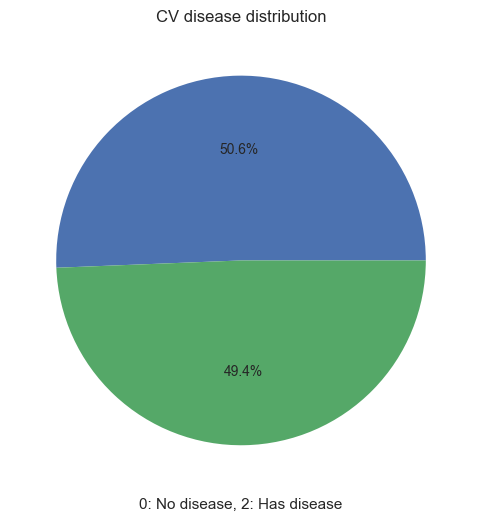

In [253]:
plt.figure(figsize=(10,6))
plt.pie(df['cardio'].value_counts(),autopct='%1.1f%%')
plt.title("CV disease distribution")
plt.xlabel('0: No disease, 2: Has disease')

The target is almost perfectly balanced so we won't have to worry about unbalanced data nor apply some of the balancing techniques. 

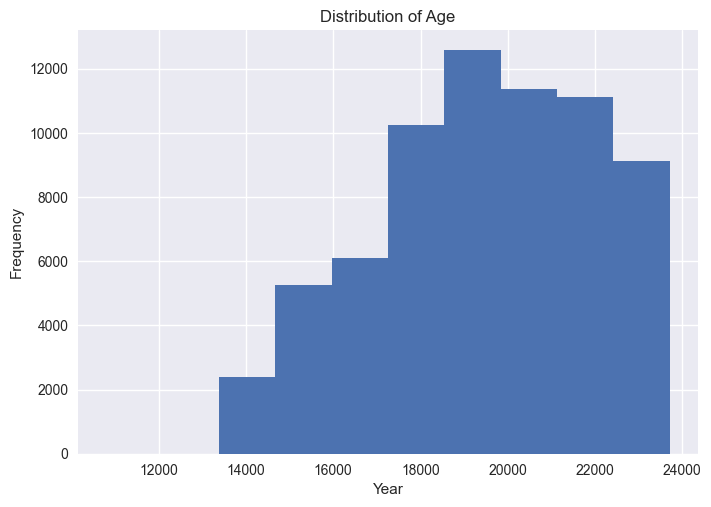

In [254]:
df['age'].hist()
plt.xlabel("Year")
plt.ylabel('Frequency')
plt.title("Distribution of Age")
plt.show()

Lets divide the histogram further by the target

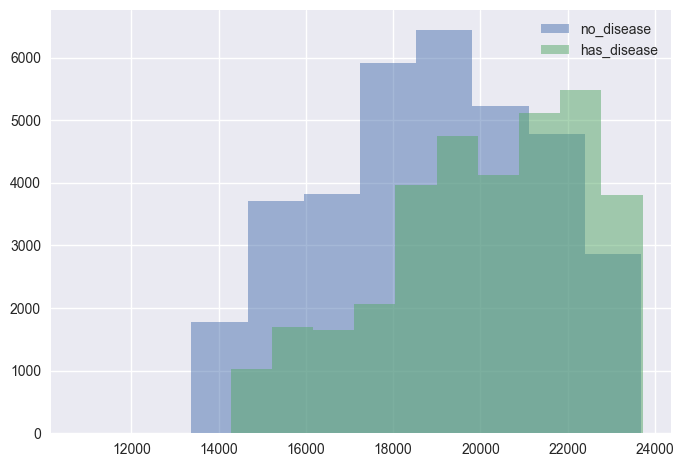

In [255]:
no_disease = df[df['cardio'] == 0]['age']
has_disease = df[df['cardio'] == 1]['age']

plt.hist(no_disease, alpha=0.5, label='no_disease')
plt.hist(has_disease, alpha=0.5, label='has_disease')
plt.legend(loc='upper right')
plt.show()

In [256]:
no_disease = df[df['cardio'] == 0]['age']
has_disease = df[df['cardio'] == 1]['age']
has_disease.mean() - no_disease.mean() 

1180.1302938790323

In [257]:
no_disease.describe()

count    34533.000000
mean     18880.051400
std       2471.865669
min      10798.000000
25%      16840.000000
50%      19004.000000
75%      20868.000000
max      23678.000000
Name: age, dtype: float64

In [258]:
has_disease.describe()

count    33672.000000
mean     20060.181694
std       2317.385090
min      14275.000000
25%      18387.000000
50%      20387.500000
75%      21902.000000
max      23713.000000
Name: age, dtype: float64

We can see that on average the people with CV diseases are older by 1180 days, which is approximately 3.24 years. When comparing the minimal values we see that the no disease group has a larger range in age and a corresponding higher SD. Let us see the left-hand tail of the histogramm 

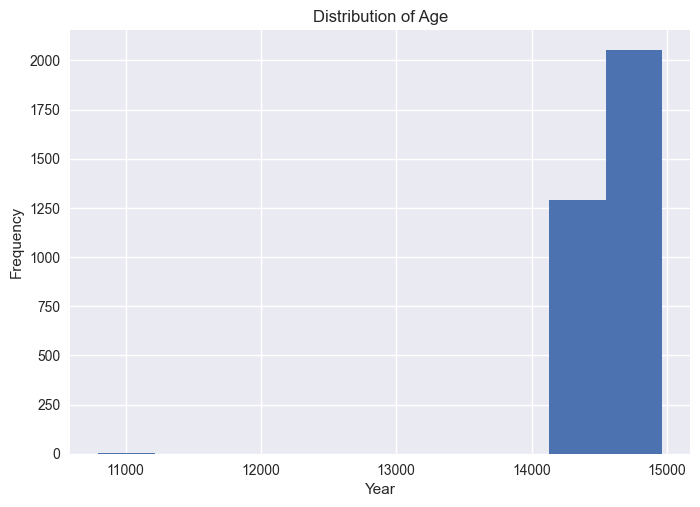

In [259]:
df[df['age'] < 15000]['age'].hist()
plt.xlabel("Year")
plt.ylabel('Frequency')
plt.title("Distribution of Age")
plt.show()

In [260]:
df[df['age'] < 14000]['age']

6057     10878
21765    10798
29871    10859
54477    10964
Name: age, dtype: int64

And we find our outliers, 4 case with age less then 11 000 days. We should remove these manually. We could apply a function for the age column to remove all entries where the value - mean > 3 x SD. But this will only partially work since for value 10798,  the mean(19462.667737) - 10798 is 8,664.67, while the 3 x SD is 86,556.41, but such are rule would not remove the other three, since their mean - value difference is less then 3 times the SD. Visually these for rows go together so it makes sense to remove all of them. 

In [261]:
df = df[df['age'] > 11000]

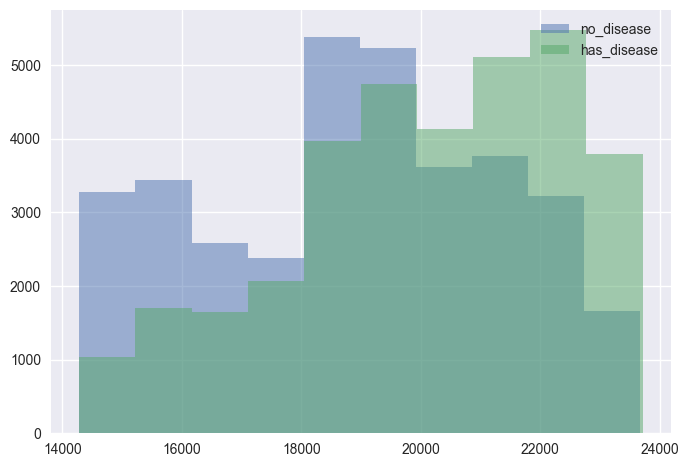

In [262]:
no_disease = df[df['cardio'] == 0]['age']
has_disease = df[df['cardio'] == 1]['age']


plt.hist(no_disease, alpha=0.5, label='no_disease')
plt.hist(has_disease, alpha=0.5, label='has_disease')
plt.legend(loc='upper right')
plt.show()

In [263]:
no_disease = df[df['cardio'] == 0]['age']
has_disease = df[df['cardio'] == 1]['age']

has_disease.mean() - no_disease.mean() 

1179.2029225216102

In [264]:
no_disease.describe()

count    34529.000000
mean     18880.978771
std       2470.506499
min      14282.000000
25%      16840.000000
50%      19005.000000
75%      20869.000000
max      23678.000000
Name: age, dtype: float64

In [265]:
has_disease.describe()

count    33672.000000
mean     20060.181694
std       2317.385090
min      14275.000000
25%      18387.000000
50%      20387.500000
75%      21902.000000
max      23713.000000
Name: age, dtype: float64

Even though we removed our outliers there is still a 3.2 year difference between the means. next question is: is this difference a problem, a.k.a. is it significant. Lets do a t-test on the two age groups with and without cv diseases. 

Check the homogeneity and normality assumptions. 

In [266]:
stats.levene(has_disease, no_disease)

LeveneResult(statistic=253.626236466137, pvalue=5.331743072405681e-57)

In [267]:
stats.shapiro(has_disease)

C:\Users\ddash\AppData\Roaming\Python\Python39\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.9595994353294373, pvalue=0.0)

In [268]:
stats.shapiro(no_disease)

ShapiroResult(statistic=0.9695902466773987, pvalue=0.0)

In [269]:
stats.ttest_ind(no_disease, has_disease)

TtestResult(statistic=-64.25531452400004, pvalue=0.0, df=68199.0)

So we learn that our data is bias in terms of age, older people have more cv-diseases on average. This might be due to the fact that such conditions are more frequently diagnosed with the increase of age. Never the less it is a drawback of the dataset that we need to be aware of.  

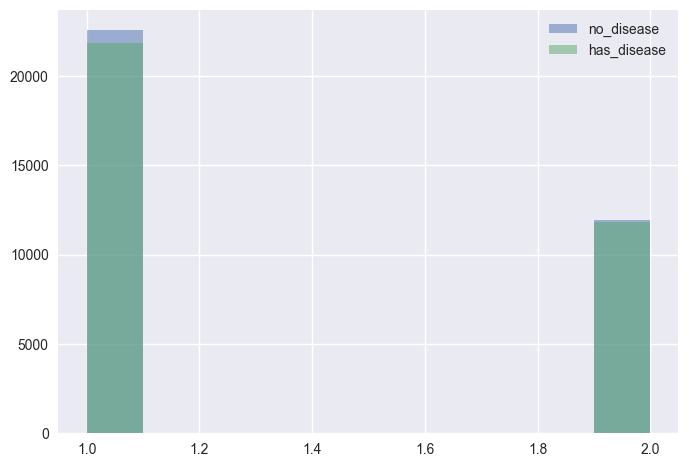

In [270]:
no_disease = df[df['cardio'] == 0]['gender']
has_disease = df[df['cardio'] == 1]['gender']


plt.hist(no_disease, alpha=0.5, label='no_disease')
plt.hist(has_disease, alpha=0.5, label='has_disease')
plt.legend(loc='upper right')
plt.show()

The data is also bias in terms of gender, but the good news is that the distribution is the same for both values of our target (the no disease and has disease groups)

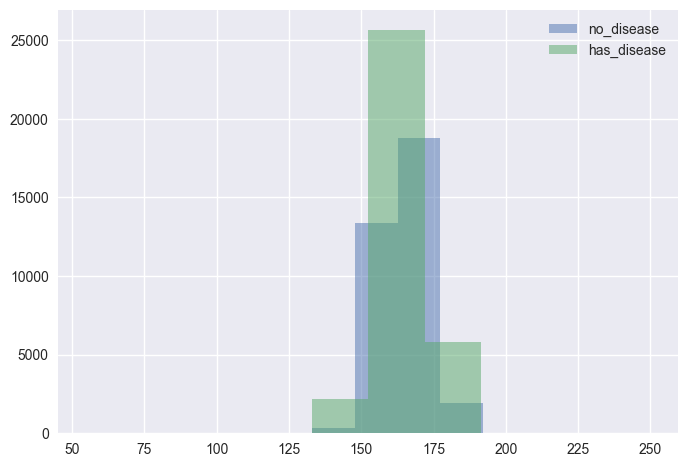

In [271]:
no_disease = df[df['cardio'] == 0]['height']
has_disease = df[df['cardio'] == 1]['height']

plt.hist(no_disease, alpha=0.5, label='no_disease')
plt.hist(has_disease, alpha=0.5, label='has_disease')
plt.legend(loc='upper right')
plt.show()

On average people with cv diseases are taller, but this most likely is due to the well known correlation of height with weight, which inturn is a variable related with factors such as obesity  

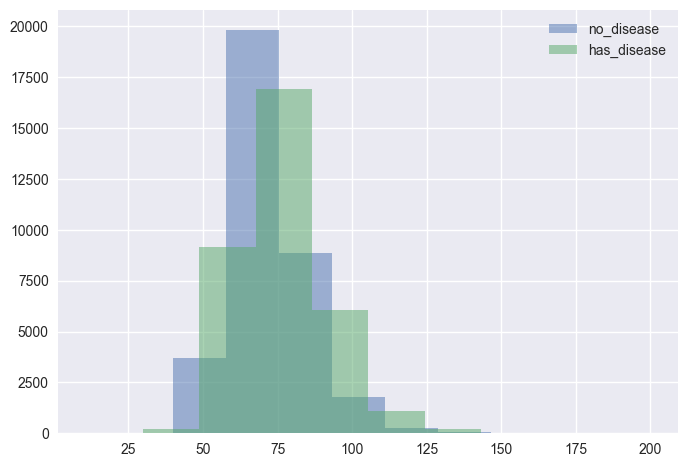

In [272]:
no_disease = df[df['cardio'] == 0]['weight']
has_disease = df[df['cardio'] == 1]['weight']

plt.hist(no_disease, alpha=0.5, label='no_disease')
plt.hist(has_disease, alpha=0.5, label='has_disease')
plt.legend(loc='upper right')
plt.show()

Indeed people with cv diseases are heavier on average, there might be some outliers her as well as in the height column lets apply the 3 X SD rule for this two variables

In [273]:
def remove_outliers(df,variables):
    '''removes entries with z-score above 3 for specific columns'''
    for variable in variables:
        df = df[np.abs(df[variable]-df[variable].mean()) <= (3*df[variable].std())]    
    return df

In [274]:
df = remove_outliers(df,['height', 'weight'])

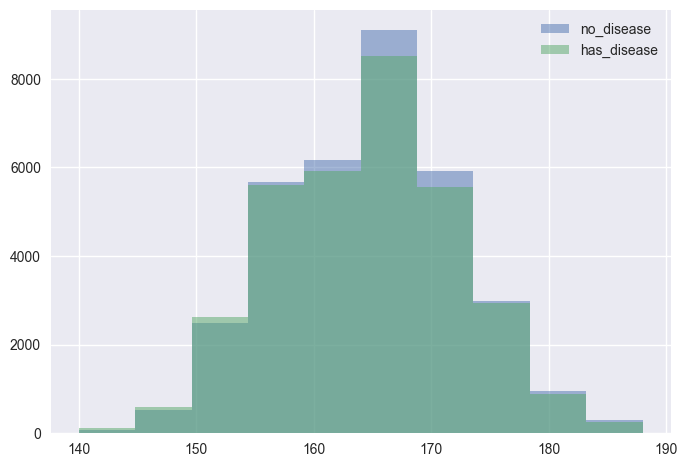

In [275]:
no_disease = df[df['cardio'] == 0]['height']
has_disease = df[df['cardio'] == 1]['height']

plt.hist(no_disease, alpha=0.5, label='no_disease')
plt.hist(has_disease, alpha=0.5, label='has_disease')
plt.legend(loc='upper right')
plt.show()

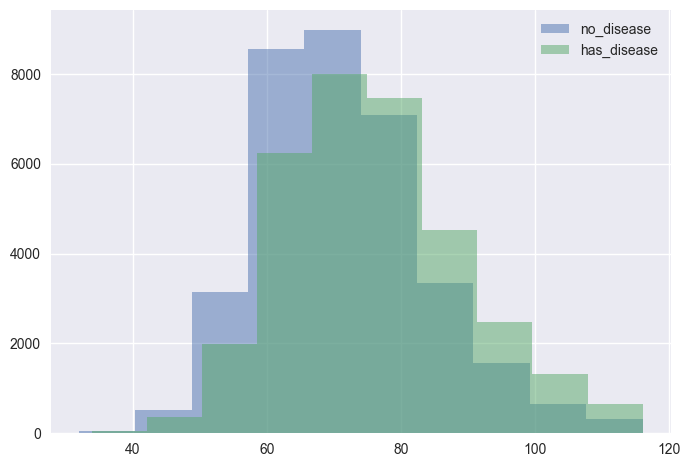

In [276]:
no_disease = df[df['cardio'] == 0]['weight']
has_disease = df[df['cardio'] == 1]['weight']

plt.hist(no_disease, alpha=0.5, label='no_disease')
plt.hist(has_disease, alpha=0.5, label='has_disease')
plt.legend(loc='upper right')
plt.show()

Next lets see the two features which describe blood pressure.

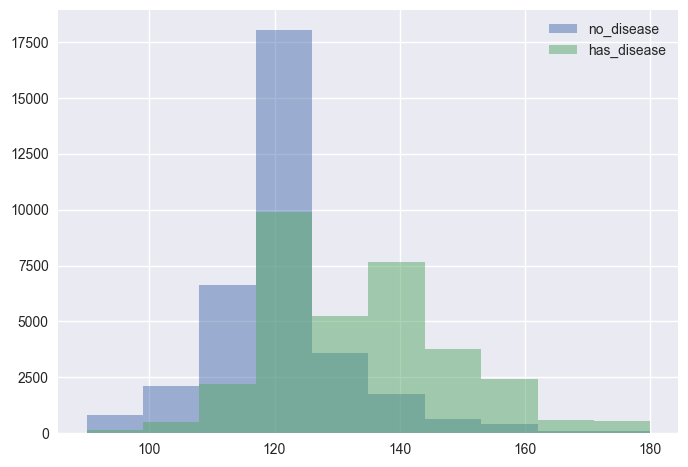

In [277]:
no_disease = df[df['cardio'] == 0]['ap_hi']
has_disease = df[df['cardio'] == 1]['ap_hi']

plt.hist(no_disease, alpha=0.5, label='no_disease')
plt.hist(has_disease, alpha=0.5, label='has_disease')
plt.legend(loc='upper right')
plt.show()

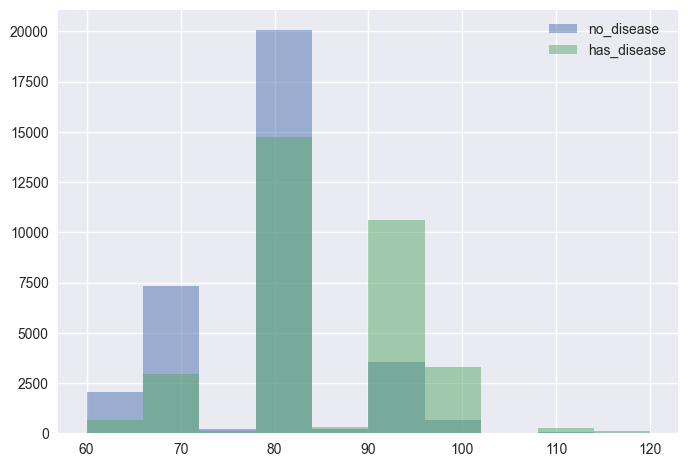

In [278]:
no_disease = df[df['cardio'] == 0]['ap_lo']
has_disease = df[df['cardio'] == 1]['ap_lo']

plt.hist(no_disease, alpha=0.5, label='no_disease')
plt.hist(has_disease, alpha=0.5, label='has_disease')
plt.legend(loc='upper right')
plt.show()

These are the upper and lower ranges of the blood pressure. Let see if we can derive a column from them that will give the range.

In [279]:
df['ap_range'] = df['ap_hi'] - df['ap_lo']

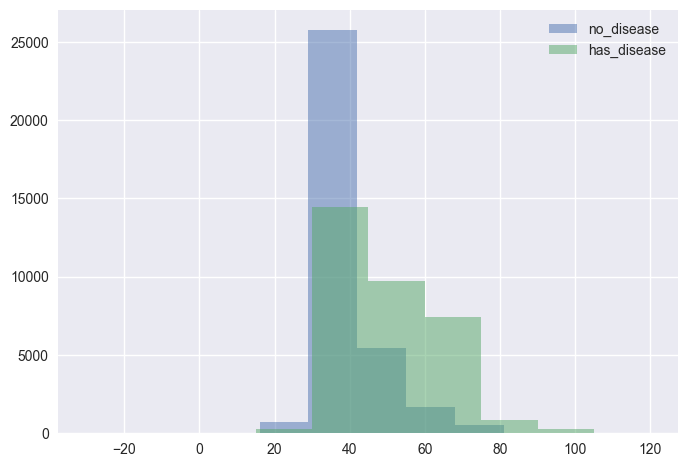

In [280]:
no_disease = df[df['cardio'] == 0]['ap_range']
has_disease = df[df['cardio'] == 1]['ap_range']

plt.hist(no_disease, alpha=0.5, label='no_disease')
plt.hist(has_disease, alpha=0.5, label='has_disease')
plt.legend(loc='upper right')
plt.show()

This variable looks more meaningful in comparison to ap_lo, although we will latter see if it is more informative then ap_hi. Lets clean the arterial pressure variables from outliers using our function. 

In [281]:
df = remove_outliers(df,['ap_lo', 'ap_hi', 'ap_range'])

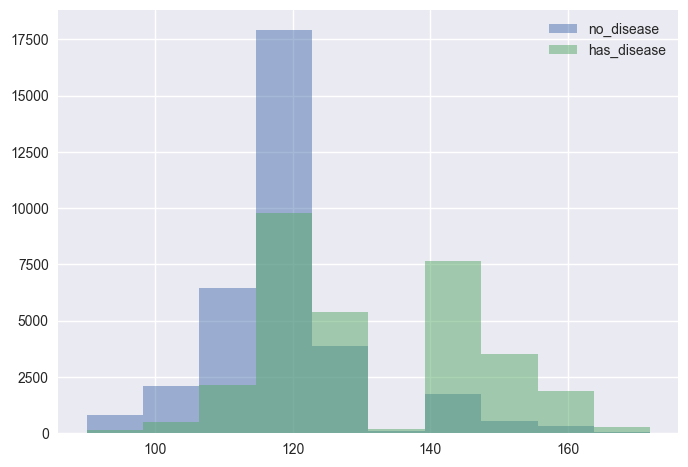

In [282]:
no_disease = df[df['cardio'] == 0]['ap_hi']
has_disease = df[df['cardio'] == 1]['ap_hi']

plt.hist(no_disease, alpha=0.5, label='no_disease')
plt.hist(has_disease, alpha=0.5, label='has_disease')
plt.legend(loc='upper right')
plt.show()

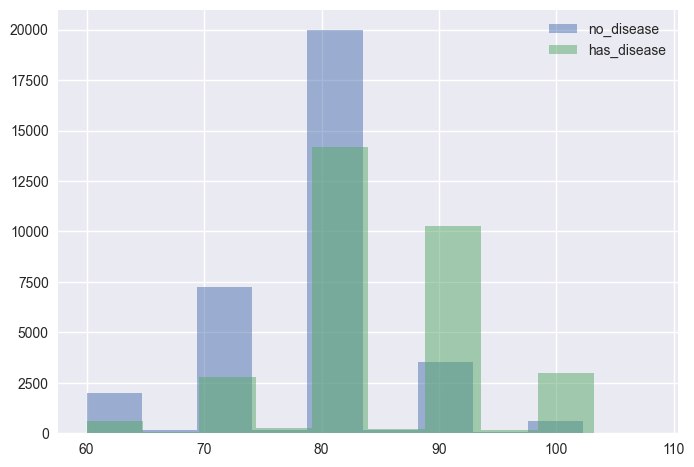

In [283]:
no_disease = df[df['cardio'] == 0]['ap_lo']
has_disease = df[df['cardio'] == 1]['ap_lo']

plt.hist(no_disease, alpha=0.5, label='no_disease')
plt.hist(has_disease, alpha=0.5, label='has_disease')
plt.legend(loc='upper right')
plt.show()

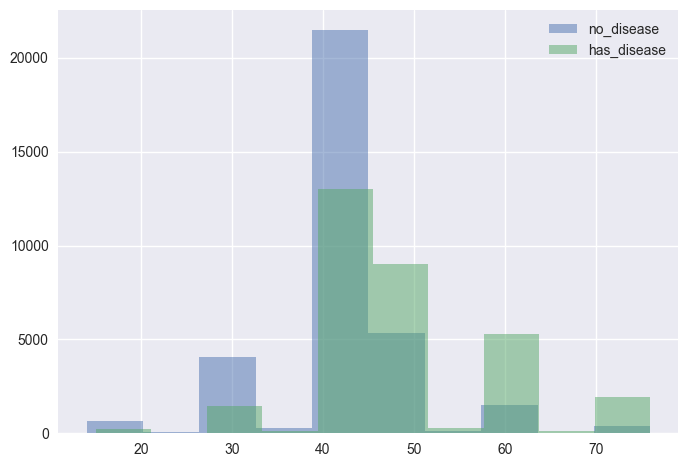

In [284]:
no_disease = df[df['cardio'] == 0]['ap_range']
has_disease = df[df['cardio'] == 1]['ap_range']

plt.hist(no_disease, alpha=0.5, label='no_disease')
plt.hist(has_disease, alpha=0.5, label='has_disease')
plt.legend(loc='upper right')
plt.show()

Next let us look at 5 categorical variables in the data set: cholesterol, glucose, smoke, alcohol and physical activity.  

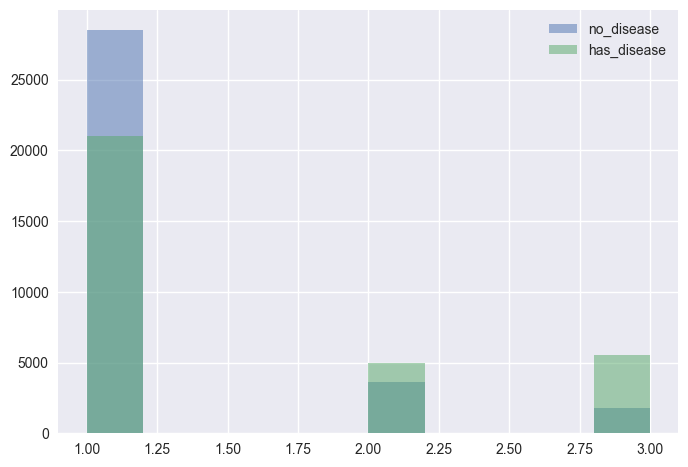

In [285]:
no_disease = df[df['cardio'] == 0]['cholesterol']
has_disease = df[df['cardio'] == 1]['cholesterol']

plt.hist(no_disease, alpha=0.5, label='no_disease')
plt.hist(has_disease, alpha=0.5, label='has_disease')
plt.legend(loc='upper right')
plt.show()

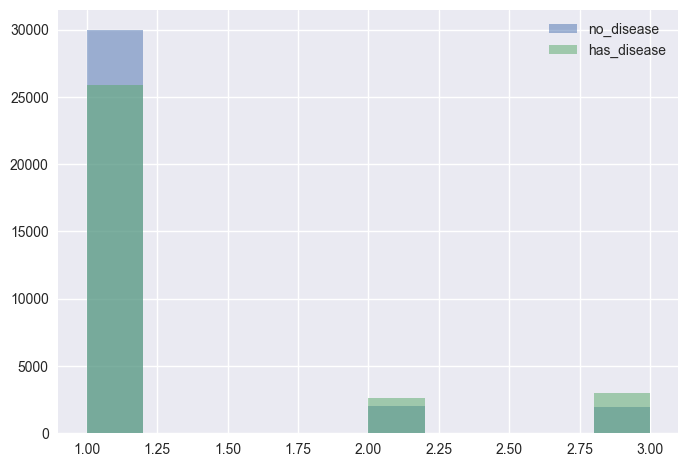

In [286]:
no_disease = df[df['cardio'] == 0]['gluc']
has_disease = df[df['cardio'] == 1]['gluc']

plt.hist(no_disease, alpha=0.5, label='no_disease')
plt.hist(has_disease, alpha=0.5, label='has_disease')
plt.legend(loc='upper right')
plt.show()

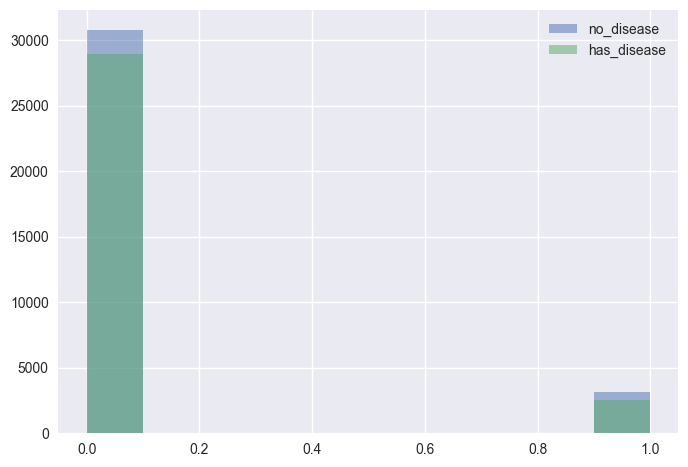

In [287]:
no_disease = df[df['cardio'] == 0]['smoke']
has_disease = df[df['cardio'] == 1]['smoke']

plt.hist(no_disease, alpha=0.5, label='no_disease')
plt.hist(has_disease, alpha=0.5, label='has_disease')
plt.legend(loc='upper right')
plt.show()

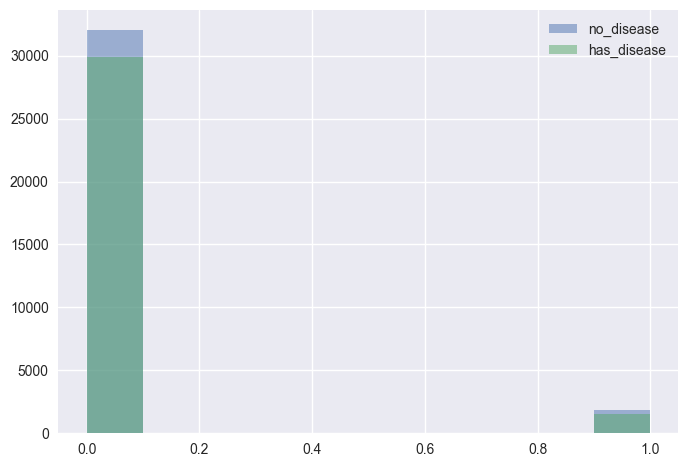

In [288]:
no_disease = df[df['cardio'] == 0]['alco']
has_disease = df[df['cardio'] == 1]['alco']

plt.hist(no_disease, alpha=0.5, label='no_disease')
plt.hist(has_disease, alpha=0.5, label='has_disease')
plt.legend(loc='upper right')
plt.show()

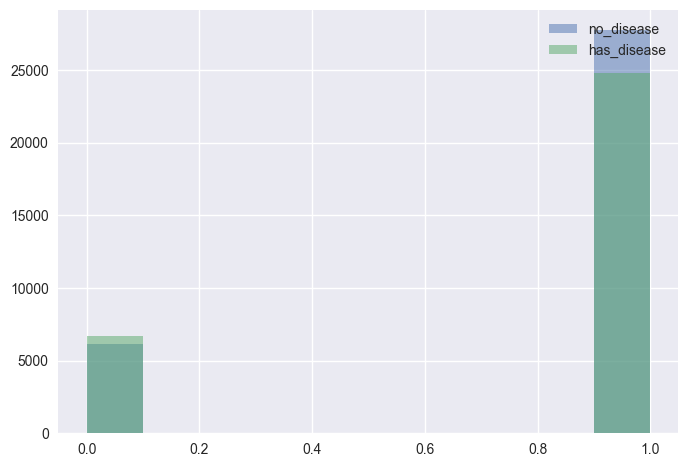

In [289]:
no_disease = df[df['cardio'] == 0]['active']
has_disease = df[df['cardio'] == 1]['active']

plt.hist(no_disease, alpha=0.5, label='no_disease')
plt.hist(has_disease, alpha=0.5, label='has_disease')
plt.legend(loc='upper right')
plt.show()

There is a significant skew in the data regarding the last 5 variables. Generally we may conclude that for the most part our data includes people with normal cholesterol and glucose levels that by in large are physically active, do not smoke or consume alcohol.

 Note that apart from their obvious skew all these variables have the drawback that they are very vague with no clear definition of what is met as a physically active person. Also there is no doze related to alcohol consumption or smoking, which we would imagine matters for the presence/absence of cv diseases.      

Let us compile the physically active, smoking and alcohol variables into a third variable, which we shall call "lifestyle". First let switch the values in the physically active column so that 0 indicate active and 1 indicate inactive

In [290]:
df['inactive'] = df['active'] - 1
df['inactive'] = df['inactive'].replace(-1, 1)

In [291]:
df['lifestyle'] = df['inactive'] + df['smoke'] + df['alco']

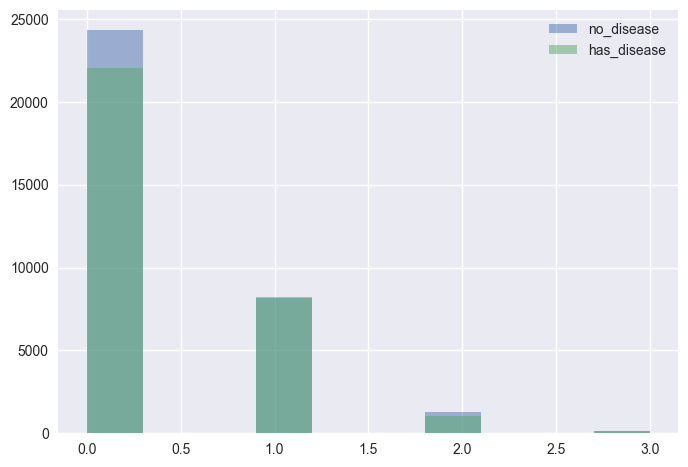

In [292]:
no_disease = df[df['cardio'] == 0]['lifestyle']
has_disease = df[df['cardio'] == 1]['lifestyle']

plt.hist(no_disease, alpha=0.5, label='no_disease')
plt.hist(has_disease, alpha=0.5, label='has_disease')
plt.legend(loc='upper right')
plt.show()

In [293]:
df['lifestyle'].value_counts() 

lifestyle
0    46378
1    16384
2     2377
3      253
Name: count, dtype: int64

This variable looks better, more then 20% of the people have at least one of the three bad habits, 2 300 have two and only 253 are smoking, drinking and inactive  

Let us look at the blood pressure category, which as we may see in the readme takes on 1 of 4 categories.

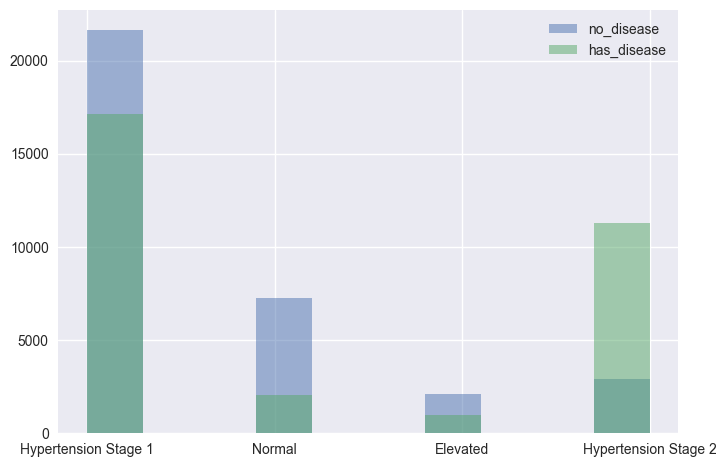

In [294]:
no_disease = df[df['cardio'] == 0]['bp_category']
has_disease = df[df['cardio'] == 1]['bp_category']

plt.hist(no_disease, alpha=0.5, label='no_disease')
plt.hist(has_disease, alpha=0.5, label='has_disease')
plt.legend(loc='upper right')
plt.show()

Let us change this variable so that each category takes on a integer from 1 to 4, so we can plot in a correlation matrix later on.   

In [295]:
df['bp_factor'] = pd.factorize(df['bp_category'])[0]

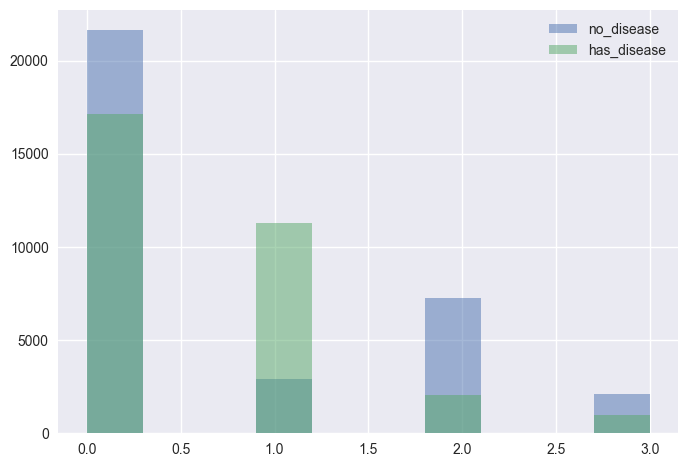

In [296]:
no_disease = df[df['cardio'] == 0]['bp_factor']
has_disease = df[df['cardio'] == 1]['bp_factor']

plt.hist(no_disease, alpha=0.5, label='no_disease')
plt.hist(has_disease, alpha=0.5, label='has_disease')
plt.legend(loc='upper right')
plt.show()

We also  have the body-mass index, which is derived from height and weight  

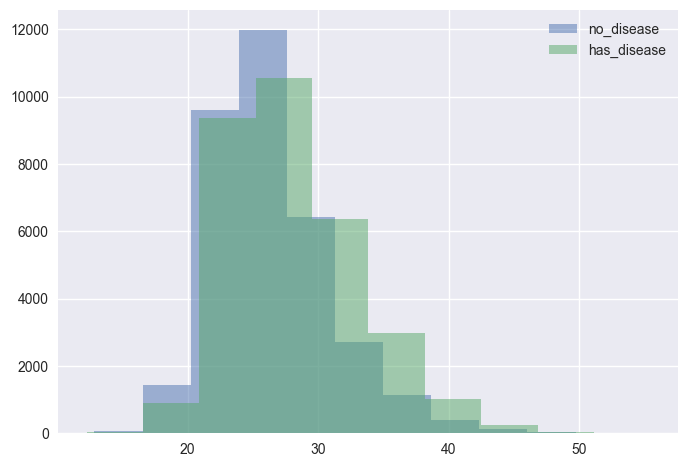

In [297]:
no_disease = df[df['cardio'] == 0]['bmi']
has_disease = df[df['cardio'] == 1]['bmi']

plt.hist(no_disease, alpha=0.5, label='no_disease')
plt.hist(has_disease, alpha=0.5, label='has_disease')
plt.legend(loc='upper right')
plt.show()

In [298]:
df = remove_outliers(df, ['bmi'])

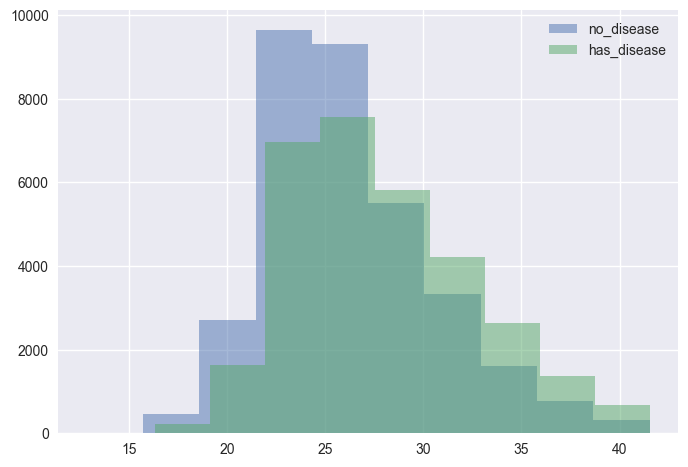

In [299]:
no_disease = df[df['cardio'] == 0]['bmi']
has_disease = df[df['cardio'] == 1]['bmi']

plt.hist(no_disease, alpha=0.5, label='no_disease')
plt.hist(has_disease, alpha=0.5, label='has_disease')
plt.legend(loc='upper right')
plt.show()

There are two redundant columns, 'age_years' which is a derivative of the age column, the 'bp_category' and 'bp_category_encoded', which we don't need since we have this variable factorized and finally inactive column, which we used to define our lifestyle column. Lets drop these columns. 

In [300]:
df = df.drop(['age_years', 'inactive', 'bp_category', 'bp_category_encoded'], axis=1)

### Feature selection

Since our data is small we will go ahead and use a correlation matrix to select the best features, based on their correlation with the target. If our dataset where large with many features we might consider some dimension reduction technique like PCA or mass feature selection like Boruta or LASSO.

Never the less correlation among variables should be always considered as it may lead to 
multicollinearity. 
  

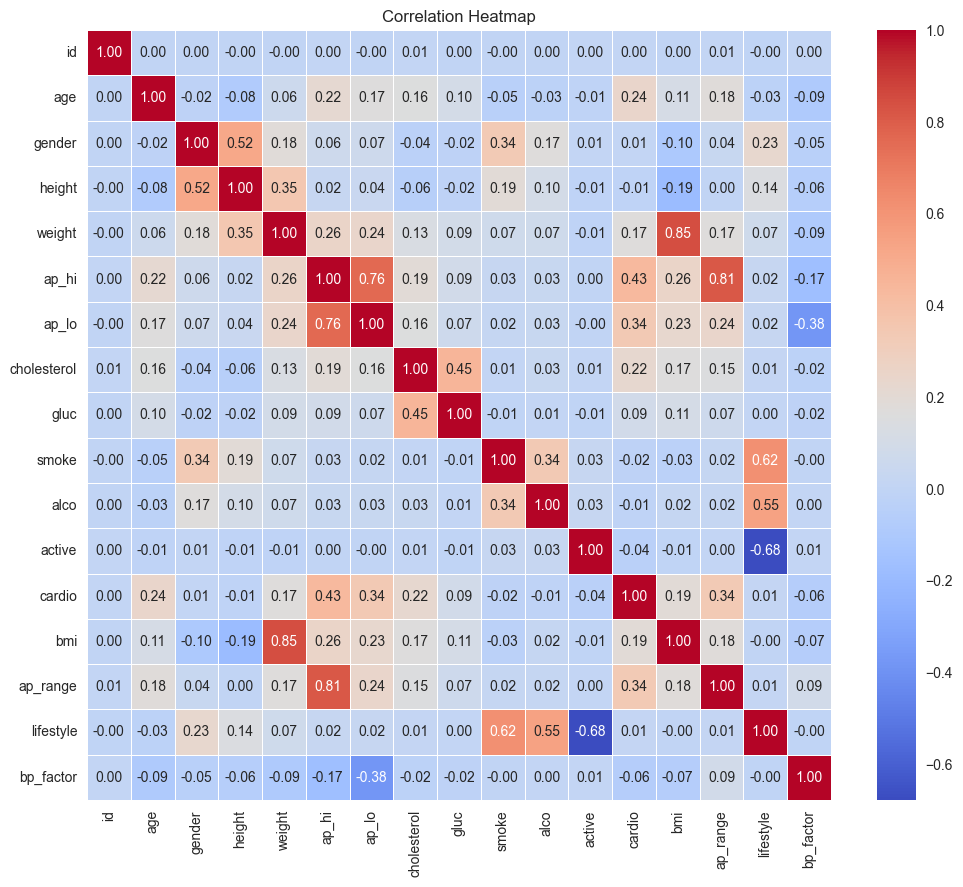

In [301]:
corr_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.title("Correlation Heatmap")
plt.show()

From the corr plot we can see that ap_hi has the strongest correlation with the target variable, better then that of ap_lo or the ap_range variable we defined. Since these three are highly correlated with each other, we shall use only the ap_hi. Weight and bmi are strongly correlated and the latter has in turn a higher correlation with the target, hence we will use the bmi. Finally our lifestyle variable has an insignificant positive correlation with the target. Seeming smoke, alco and especially active work better on their own. Gluc and cholesterol are correlated, but since the index is below 0.5, we may include both variables.

All and all this leaves us with 9 variables: ap_hi, bp_factor, bmi, smoke, alco, active, age, gluc and cholesterol.

To note in my estimate this dataset would not be sufficient for a real life situation, some of the variables are very skewed and the proper approach would be to go collect more data. Never the less since this is a demonstrative analysis we shall proceed to modeling.   

In [302]:
df2 = df[['cardio','ap_hi', 'bp_factor', 'bmi', 'smoke', 
          'alco', 'active', 'age', 'gluc', 'cholesterol']]

### Compare several classification models

#### Train - Test split

Before proceeding further, we wish to split our data into a training set and a testing set. We will first need to separate features from target and then we will make use of sklearn's train_test_split() function. Since the data is relatively small we will choose to keep 30% of our data for final testing of our model.

In [303]:
def XY_split(df):
    '''Define a function for spliting the features and the targe'''
    Y = df['cardio']
    X = df.drop(['cardio'], axis = 1)
    return X, Y

In [304]:
X, Y = XY_split(df2) 

In [305]:
# Train-test split (30% to test set)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [306]:
print(len(X_train), len(X_test), len(y_train), len(y_test))

45355 19439 45355 19439


Now let us compare 5 classification models:
1. Logistic regression - probably the most widely used mode for classification problems
2. K-means Nearest Neighbor 
3. Decision tree
4. Random forest
5. Gradient Boosting machine (GBM)

Note that we will compare the models using a 10-fold cross validation approach using the train data and save the test data only for our final decision after parameter tunning.

As the 'scoring' argument for the assessment of the model's predictive power we will use the area under the ROC curve, which is a standard metric for assessing classifiers. The full list of [metrics and scoring: quantifying the quality of predictions.](https://scikit-learn.org/stable/modules/model_evaluation.html#metrics-and-scoring-quantifying-the-quality-of-predictions) is in the scikit-lear documentation.

At the final stage of comparison we will compare several metrics but for our initial choice of models and parameter tunning the AUC will do.    

In [307]:
seed = 34

pipelines = []
pipelines.append(('ScaledLR', 
                  Pipeline([('Scaler', StandardScaler()),('LR',LogisticRegression())])))
pipelines.append(('ScaledRF', 
                  Pipeline([('Scaler', StandardScaler()),('RF', RandomForestClassifier(
                      random_state=21))])))
pipelines.append(('ScaledKNN', 
                  Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsClassifier())])))
pipelines.append(('ScaledDT', 
                  Pipeline([('Scaler', StandardScaler()),('DT', DecisionTreeClassifier())])))
pipelines.append(('ScaledGBM', 
                  Pipeline([('Scaler', StandardScaler()),('GBM', GradientBoostingClassifier(
                      random_state=21))])))

results = []
names = []

for name, model in pipelines:
    kfold = KFold(n_splits=10, random_state=21, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='roc_auc')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)


ScaledLR: 0.787445 (0.006908)
ScaledRF: 0.755884 (0.006097)
ScaledKNN: 0.739862 (0.006898)
ScaledDT: 0.629610 (0.007673)
ScaledGBM: 0.796448 (0.006572)


We notice that the lone Decision Tree had the least classification power, followed by the KNN, while the Logistic regression, Random forest and GBM have a very close AUC. Let us continue with parameter tuning this two models. 

#### Hyperparameter tuning of GBM classifier

There are two types of hyperparameters in GBMs we might consider adjusting. Boosting parameters, which are related to the gradient such as leaning rate and n_estimators. The others are tree based hyperparameters like max_depth, num_samples_split, min_samples_leaf. We will consider each ot these and tune one hyperparameter at a time.   

First let us right a helpful function for parameter tunning, which takes as parameters the model, x, y datasets, the hyperparameter in question and a list of the values we want to check.

In [308]:
def model_tunning(model,x, y, hyperparameter, values):
    '''Check the best hyperparameter from a list of values for a specific model'''
    seed = 34

    scaler = StandardScaler().fit(x)
    rescaledX = scaler.transform(x)
    param_grid = dict(z=np.array(values))
    param_grid[hyperparameter] = param_grid['z']
    del param_grid['z']
    kfold = KFold(n_splits=10, random_state=21, shuffle=True)
    grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='roc_auc', cv=kfold)
    grid_result = grid.fit(rescaledX, y)

    means = grid_result.cv_results_['mean_test_score']
    stds = grid_result.cv_results_['std_test_score']
    params = grid_result.cv_results_['params']
    for mean, stdev, param in zip(means, stds, params):
        print("%f (%f) with: %r" % (mean, stdev, param))

    print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

**Number of estimators**

Here we will consider number of estimators (our trees) of 50, 100, 150, 200, and 350 for the GBM using 10 fold cross-validation and the AUC to determine the best number of estimators.

In [309]:
model_tunning(GradientBoostingClassifier(random_state=21), 
              X_train, y_train, 'n_estimators', [50, 100, 150, 200, 350])

0.795405 (0.006551) with: {'n_estimators': 50}
0.796432 (0.006570) with: {'n_estimators': 100}
0.796431 (0.006721) with: {'n_estimators': 150}
0.796379 (0.006921) with: {'n_estimators': 200}
0.795596 (0.007175) with: {'n_estimators': 350}
Best: 0.796432 using {'n_estimators': 100}


We can see that 100 estimators works best, so from now one we will set n_estimators to 100

**Learning rate**

The default value of the learning rate in the GBM is 0.1, we can try to lower and two higher for start 0.05, 0.075, 0.1, 0.25 and 0.5 

In [310]:
model_tunning(GradientBoostingClassifier(random_state=21, n_estimators=100), 
              X_train, y_train, 'learning_rate', [0.05,0.075,0.1,0.25,0.5])

0.795363 (0.006617) with: {'learning_rate': 0.05}
0.796121 (0.006590) with: {'learning_rate': 0.075}
0.796432 (0.006570) with: {'learning_rate': 0.1}
0.795501 (0.006916) with: {'learning_rate': 0.25}
0.791412 (0.006882) with: {'learning_rate': 0.5}
Best: 0.796432 using {'learning_rate': 0.1}


We see that the best learning rate is 0.1 for the further tunning this parameter will be set as 0.1

**Max depth**

In GBMs the smaller the trees (that is with few splits) the better. Our default has been 3 so far, lets consider, 1, 2, 3, 4 and 5.

In [311]:
model_tunning(GradientBoostingClassifier(random_state=21, n_estimators=100, 
                                         learning_rate=0.1), 
              X_train, y_train, 'max_depth', [1,2,3,4,5])

0.791029 (0.007437) with: {'max_depth': 1}
0.795057 (0.006986) with: {'max_depth': 2}
0.796432 (0.006570) with: {'max_depth': 3}
0.797019 (0.006618) with: {'max_depth': 4}
0.796516 (0.006970) with: {'max_depth': 5}
Best: 0.797019 using {'max_depth': 4}


**Min sample leaf**

The default values is 1 min_samples_leaf is 1, so let us consider 2 and 3 as well.

In [312]:
model_tunning(GradientBoostingClassifier(random_state=21, n_estimators=50,
                                         max_depth = 4, 
                                         learning_rate=0.1), 
              X_train, y_train, 'min_samples_leaf', [1,2,3,4,5])

0.796679 (0.006551) with: {'min_samples_leaf': 1}
0.796445 (0.006612) with: {'min_samples_leaf': 2}
0.796580 (0.006747) with: {'min_samples_leaf': 3}
0.796463 (0.006742) with: {'min_samples_leaf': 4}
0.796694 (0.006624) with: {'min_samples_leaf': 5}
Best: 0.796694 using {'min_samples_leaf': 5}


We see the min_samples_leaf of 5 works best. Lets try with 5, 6 and 7 to see if the performance. 

In [313]:
model_tunning(GradientBoostingClassifier(random_state=21, n_estimators=50,
                                         max_depth = 4, 
                                         learning_rate=0.1), 
              X_train, y_train, 'min_samples_leaf', [5, 6, 7])

0.796694 (0.006624) with: {'min_samples_leaf': 5}
0.796632 (0.006662) with: {'min_samples_leaf': 6}
0.796693 (0.006640) with: {'min_samples_leaf': 7}
Best: 0.796694 using {'min_samples_leaf': 5}


Five is still the optimal value for this hyperparameter. 

**Min sample split**

Finally we will tune the min_sample_split. The default values is 2 min_samples_leaf is 1, so let us consider 2, 5 and 7.

In [314]:
model_tunning(GradientBoostingClassifier(random_state=21, n_estimators=50,
                                         max_depth = 4, 
                                         learning_rate=0.1, min_samples_leaf=5), 
              X_train, y_train, 'min_samples_split', [2,5,7])

0.796694 (0.006624) with: {'min_samples_split': 2}
0.796694 (0.006624) with: {'min_samples_split': 5}
0.796694 (0.006624) with: {'min_samples_split': 7}
Best: 0.796694 using {'min_samples_split': 2}


There seems to be no point in tuning this parameter. Thus our final version of the GBM is with n_estimators=50, max_depth = 4, learning_rate=0.1 and min_samples_leaf=5. Lets do the model comparison again, now with both the tuned and the default GBM.

In [315]:
pipelines = []
pipelines.append(('ScaledLR', 
                  Pipeline([('Scaler', StandardScaler()),('LR',LogisticRegression())])))
pipelines.append(('ScaledRF', 
                  Pipeline([('Scaler', StandardScaler()),('RF', RandomForestClassifier(
                      random_state=21))])))
pipelines.append(('ScaledGBM', 
                  Pipeline([('Scaler', StandardScaler()),('GBM', GradientBoostingClassifier(
                      random_state=21))])))
pipelines.append(('ScaledGBM_tunned', 
                  Pipeline([('Scaler', StandardScaler()),('GBM_tunned', GradientBoostingClassifier(
                      random_state=21, n_estimators=100,max_depth = 4, learning_rate=0.1, 
                      min_samples_leaf=5    
                                         ))])))

results = []
names = []

for name, model in pipelines:
    kfold = KFold(n_splits=10, random_state=21, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='roc_auc')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

ScaledLR: 0.787445 (0.006908)
ScaledRF: 0.755884 (0.006097)
ScaledGBM: 0.796448 (0.006572)
ScaledGBM_tunned: 0.796918 (0.006879)


We can see that all and all the gain AUC from the hyperparameter tuning is negligible in fact most of the parameters showed highest AUC when set to their default values.    

#### Hyperparameter tuning of Random forest

Similarly to the GBM the RF is a multiple tree based model. There is a major difference in their abroach thought. Generally the GBM works best with shallow trees with only a few splits, our GBM has the max depth of 4 splits. In RF the more complex the tree the better, although the deeper the trees get the more we risk overfitting.  

**Number of estimators**

Here we will consider number of estimators (our trees) of 50, 100, 200,300 and 400 for the RF again using 10 fold cross-validation and the AUC to determine the best number of estimators.

In [316]:
model_tunning(RandomForestClassifier(random_state=21), 
              X_train, y_train, 'n_estimators', [50, 100, 200, 300, 400])

0.753810 (0.006567) with: {'n_estimators': 50}
0.755905 (0.006102) with: {'n_estimators': 100}
0.757031 (0.006099) with: {'n_estimators': 200}
0.757438 (0.006026) with: {'n_estimators': 300}
0.757474 (0.005969) with: {'n_estimators': 400}
Best: 0.757474 using {'n_estimators': 400}


We see that 400 works best. We could continue adding trees, but this would be bad practice since on one hand the more trees the more computational time to fit the model and on the other hand we have 9 variables, which can be combined in diverse ways in the forest but still the combinations are limited and at one point adding more trees becomes redundant.  

**Criterion**

This is the function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “log_loss” and “entropy” both for the Shannon information gain. Lets try all tree criterion using 400 trees.

In [317]:
model_tunning(RandomForestClassifier(random_state=21, n_estimators=400), 
              X_train, y_train, 'criterion', ['gini', 'entropy', 'log_loss'])

0.757474 (0.005969) with: {'criterion': 'gini'}
0.758365 (0.006086) with: {'criterion': 'entropy'}
0.758365 (0.006086) with: {'criterion': 'log_loss'}
Best: 0.758365 using {'criterion': 'entropy'}


We see that there is a 0.001 increase when we used either entropy or log_loss, so let us continue using entropy 

**Max features**

By default random forest includes only a part of the features in each tree and then the model obtains the final prediction based on a majority vote from all the trees. The number of randomly selected features can influence the generalization error in two ways: selecting many features increases the strength of the individual trees whereas reducing the number of features leads to a lower correlation among the trees increasing the strength of the forest as a whole.

Let us compare the sqrt number of features vs their log.

In [318]:
model_tunning(RandomForestClassifier(random_state=21, n_estimators=400,
                                     criterion=	'entropy'), 
              X_train, y_train, 'max_features', ['sqrt', 'log2'])

0.758365 (0.006086) with: {'max_features': 'sqrt'}
0.758365 (0.006086) with: {'max_features': 'log2'}
Best: 0.758365 using {'max_features': 'sqrt'}


There seems to be no point in any tunning her.

**Min_samples_leaf**

Finally we will consider the Min_samples_leaf, which is the minimum number of samples required to be at a leaf node. This has an effect on how deep the trees go, and generally larger numbers will mean that the trees will have less depth and predictive power, but on the other hand this might protect us from overfitting.  

In [319]:
model_tunning(RandomForestClassifier(random_state=21, n_estimators=400,
                                     criterion=	'entropy'), 
              X_train, y_train, 'min_samples_leaf', [1, 2, 3])

0.758365 (0.006086) with: {'min_samples_leaf': 1}
0.778062 (0.006021) with: {'min_samples_leaf': 2}
0.784943 (0.006073) with: {'min_samples_leaf': 3}
Best: 0.784943 using {'min_samples_leaf': 3}


The increase of min_samples_leaf paid off, with an 0.03 increase in the AUC compared to the default value of 1. Let us also consider min_samples_leaf = 4 and 5  

In [320]:
model_tunning(RandomForestClassifier(random_state=21, n_estimators=400,
                                     criterion=	'entropy'), 
              X_train, y_train, 'min_samples_leaf', [3, 4, 5])

We see that the min sample leaf of 5 gives the best AUC. Let us use this value for the RF. 

Now that we have tunned the RF we may see how it peris to the default version and to the rest of the models.

In [ ]:
pipelines = []
pipelines.append(('ScaledLR', 
                  Pipeline([('Scaler', StandardScaler()),('LR',LogisticRegression())])))
pipelines.append(('ScaledRF', 
                  Pipeline([('Scaler', StandardScaler()),('RF', RandomForestClassifier(
                      random_state=21))])))
pipelines.append(('ScaledRF_tunned', 
                  Pipeline([('Scaler', StandardScaler()),('RF', RandomForestClassifier(
                      random_state=21, n_estimators=400, criterion='entropy', 
                      min_samples_leaf=5))])))
pipelines.append(('ScaledGBM', 
                  Pipeline([('Scaler', StandardScaler()),('GBM', GradientBoostingClassifier(
                      random_state=21))])))
pipelines.append(('ScaledGBM_tunned', 
                  Pipeline([('Scaler', StandardScaler()),('GBM_tunned', GradientBoostingClassifier(
                      random_state=21, n_estimators=100,max_depth = 4, learning_rate=0.1, 
                      min_samples_leaf=5    
                                         ))])))

results = []
names = []

for name, model in pipelines:
    kfold = KFold(n_splits=10, random_state=21, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='roc_auc')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

ScaledLR: 0.788417 (0.006778)
ScaledRF: 0.778141 (0.005708)
ScaledRF_tunned: 0.792427 (0.005930)
ScaledGBM: 0.797350 (0.006255)
ScaledGBM_tunned: 0.797678 (0.006667)


In model tunning of the RF resulted in about 0.02 increase in the AUC.

#### Optimization of the Logistic Regression

Although the logistic regression provides hyperparameters to be tunned in practice they have very little effect on the models performance. 

We can do something else however. The RF and GBM both take the continuos features of the dataset and split them in their tree nodes respectively. In other words the continuos data is broken down in range categories or bins. The simple LogReg uses the continuos variables, but if they were binned properly before model fitting, this generally increases the LogReg's performance.

We have three ap_hi, bmi and age. We may bin these using the Weight of Evidence (WOE) and Information value (IV) method and then one hot encode them. Note this approach is only for Logistic Regression and is not applicable for tree base models.

**Feature binning**

First lets bin the three continuos features. We start with cuts following the histograms of each variable, then we may adjust the bins depending on the WOE and IV

In [231]:
def feature_binning(df):
    '''Bin the continuos variables for the LogReg'''
    ds = df.copy()
    # 1. ap_hi binning
    bincuts = [-np.inf, 100, 119, 120, np.inf]
    ds['ap_hi_bin'] = pd.cut(
        ds['ap_hi'].fillna(0), bins=bincuts, right=True, labels=False).astype('str')    
    
    # 2. bmi binning
    bincuts = [-np.inf, 22, 25, 27, 30, 35, np.inf]
    ds['bmi_bin'] = pd.cut(
        ds['bmi'].fillna(0), bins=bincuts, right=True, labels=False).astype('str')

    # 3. age binning
    bincuts = [-np.inf, 14000, 15000, 16000, 17000, 18000, 19000, 20000, 21000, 22000, 23000, 24000, np.inf]
    ds['age_bin'] = pd.cut(
        ds['age'].fillna(0), bins=bincuts, right=True, labels=False).astype('str') 
    
    return ds

Then we need a function to calculate the WOE and IV

In [224]:
def calculate_woe_iv(dataset, feature, target):
    '''Calculate the WOE and IV for a list of features in a dataset'''
    lst = []
    for i in range(dataset[feature].nunique()):
        val = list(dataset[feature].unique())[i]
        lst.append({
            'Value': val,
            '0': dataset[(dataset[feature] == val) & (dataset[target] == 0)].count()[feature],
            '1': dataset[(dataset[feature] == val) & (dataset[target] == 1)].count()[feature],
            'All': dataset[dataset[feature] == val].count()[feature]
        })
    dset = pd.DataFrame(lst)
    dset['Distr_0'] = dset['0']/dset['0'].sum()
    dset['Distr_1'] = dset['1']/dset['1'].sum()
    dset['WOE'] = -np.log(dset['Distr_0']/dset['Distr_1'])
    dset['IV'] = -(dset['Distr_0']-dset['Distr_1'])*dset['WOE']
    iv = dset['IV'].sum()
    dset['IV_total'] = iv
    dset['Value'] = dset['Value'].astype('int')
    dset = dset.sort_values(by='Value')
    return dset

Now that we have our two functions lets first concatenate X_train data with the y_train target and then bin the variables

In [233]:
df_train = pd.concat([X_train, y_train], axis = 1)
df_train = feature_binning(df_train)

Now we can start adjusting the bins cuts, which is going back a forth between the feature_binning function and the WOE and IV result table. There is some subjectivity in choosing the best bins more can be found in [this article](https://www.listendata.com/2015/03/weight-of-evidence-woe-and-information.html). Generally we want a high total IV, but not higher then 0.5 (this is a rule of thumb and may have exceptions as we will soon see). The WOE should be polar, as if the table is sorted by WOE and bins with similar WOE values should be merged in single bins. Also bins should be balances as we do not one most of the data to fall in only a few bins. 

Let us look at the age variable, note that I will not include all examined combination of bins in the code, but only the final ones.

In [225]:
calculate_woe_iv(df_train, 'age_bin', 'cardio')

,Value,0,1,All,Distr_0,Distr_1,WOE,IV,IV_total
9,1,1803,485,2288,0.076434,0.022282,-1.232627,0.066749,0.261245
6,2,2191,946,3137,0.092882,0.043462,-0.759439,0.037531,0.261245
1,3,2363,1355,3718,0.100174,0.062253,-0.475699,0.018039,0.261245
7,4,1574,1288,2862,0.066726,0.059175,-0.120098,0.000907,0.261245
3,5,3940,2679,6619,0.167027,0.123082,-0.305306,0.013417,0.261245
0,6,3581,3095,6676,0.151808,0.142194,-0.065423,0.000629,0.261245
2,7,2558,2878,5436,0.108440,0.132225,0.198301,0.004716,0.261245
4,8,3191,4206,7397,0.135275,0.193237,0.356609,0.020670,0.261245
5,9,1488,2656,4144,0.063080,0.122025,0.659820,0.038893,0.261245
8,10,900,2178,3078,0.038153,0.100064,0.964199,0.059694,0.261245


We have a total IV of 0.261, which is pretty good (high, but not too high). The WOE are polar, they start at -1.23, are closed to zero around bin number six (between 18000 and 19000 days fo age or 50 to 53 years), and then increases to 0.964 for the final bin. The negative values mean that for this bins the chances of CV diseases are lower, because they include younger people, around 50 the target values are balance (for this and adjacent bins the age is not such a good predictor of CV diseases) and for the following bins the chances for having a CV disease increase. 

In [226]:
calculate_woe_iv(df_train, 'ap_hi_bin', 'cardio')

,Value,0,1,All,Distr_0,Distr_1,WOE,IV,IV_total
3,0,1967,425,2392,0.083386,0.019526,-1.451744,0.092709,0.794279
0,1,4689,1556,6245,0.198779,0.071488,-1.022670,0.130177,0.794279
2,2,12369,6744,19113,0.524355,0.309841,-0.526109,0.112857,0.794279
1,3,4564,13041,17605,0.193480,0.599145,1.130330,0.458536,0.794279


There are several problems with this WOE table. On one hand the bins are unbalanced, with 19113 cases in a single bin (ap_hi = 120). Secondly the last bin which includes ap_hi > 120 is the most informative with a IV of 0.45. However this should not surprise us as for most adults, normal blood pressure at rest is within the range of 100–130 mmHg systolic. Higher blood pressure is a strong predictor of CV diseases and the IV reflects this. So we may use this binning in this case, whereas in other situation we would consider adjusting the bins or dropping the variable.   

In [234]:
calculate_woe_iv(df_train, 'bmi_bin', 'cardio')

,Value,0,1,All,Distr_0,Distr_1,WOE,IV,IV_total
5,0,2934,1335,4269,0.124380,0.061334,-0.707004,0.044574,0.142896
1,1,7958,5504,13462,0.337361,0.252871,-0.288271,0.024356,0.142896
4,2,4224,3715,7939,0.179067,0.170679,-0.047972,0.000402,0.142896
0,3,4152,4581,8733,0.176014,0.210466,0.178759,0.006159,0.142896
2,4,3324,4660,7984,0.140913,0.214095,0.418278,0.030611,0.142896
3,5,997,1971,2968,0.042265,0.090554,0.761977,0.036795,0.142896


This is also very logical the higher the bmi the higher the chance of CV disease.

We are now all set to compared the binned LR with the normal one and the other models as well. First lets prepare are X and Y train data set, remembering to removed the features age, ap_hi and bmi, but keep their binned versions. 

In [237]:
X_train_LR = df_train.drop(['cardio', 'ap_hi', 'age', 'bmi'], axis=1) 
y_train_LR = df_train['cardio']
X_train_LR.head()


,id,gender,height,weight,ap_lo,cholesterol,gluc,smoke,alco,active,ap_range,lifestyle,bp_factor,ap_hi_bin,bmi_bin,age_bin
25830,37875,1,152,68.5,70,1,1,0,0,1,40,0,2,1,3,6
50612,74079,1,160,58.0,90,1,1,0,0,1,50,0,1,3,1,3
34928,51194,1,159,60.0,80,2,1,0,0,1,40,0,0,2,1,7
39602,58080,1,160,60.0,80,1,1,0,0,1,40,0,0,2,1,5
35193,51582,1,157,84.0,100,1,1,0,0,1,40,0,1,3,4,8


In [ ]:
pipelines = []
pipelines.append(('ScaledLR', 
                  Pipeline([('Scaler', StandardScaler()),('LR',LogisticRegression())])))

results = []
names = []

for name, model in pipelines:
    kfold = KFold(n_splits=10, random_state=21, shuffle=True)
    cv_results = cross_val_score(model, y_train_LR, y_train_LR = df_train['cardio']
, cv=kfold, scoring='roc_auc')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

In [ ]:
pipelines = []
pipelines.append(('ScaledLR', 
                  Pipeline([('Scaler', StandardScaler()),('LR',LogisticRegression())])))
pipelines.append(('ScaledRF_tunned', 
                  Pipeline([('Scaler', StandardScaler()),('RF', RandomForestClassifier(
                      random_state=21, n_estimators=400, criterion='entropy', 
                      min_samples_leaf=5))])))
pipelines.append(('ScaledGBM_tunned', 
                  Pipeline([('Scaler', StandardScaler()),('GBM_tunned', GradientBoostingClassifier(
                      random_state=21, n_estimators=100,max_depth = 4, learning_rate=0.1, 
                      min_samples_leaf=5    
                                         ))])))

results = []
names = []

for name, model in pipelines:
    kfold = KFold(n_splits=10, random_state=21, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='roc_auc')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

#### Residual diagnostics the LR, RF and GBM classifier

Before we evaluate the models with the test dataset, we can do some residual diagnostics. The approached used here is mostly based on [Chapter 19](https://ema.drwhy.ai/residualDiagnostic.html#MethodResidualDiagnostic) from Explanatory Model Analysis by Przemyslaw Biecek and Tomasz Burzykowski

In [ ]:
def residual_plot(model,x,y):
    '''Build a residual plot'''
    model = model.fit(x, y)
    model_exp = dx.Explainer(model, x, y)
    model_exp_diag = model_exp.model_diagnostics()
    model_exp_diag.plot()
    model_exp_diag.plot(variable = 'ids', yvariable = 'abs_residuals')

In [ ]:
residual_plot(LogisticRegression(), X_train_LR,y_train_LR)

In [ ]:
residual_plot(RandomForestClassifier(random_state=21, n_estimators=400, criterion='entropy', 
                      min_samples_leaf=5), X_train,y_train)

In [ ]:
residual_plot(GradientBoostingClassifier(
                      random_state=21, n_estimators=100,max_depth = 4, learning_rate=0.1, 
                      min_samples_leaf=5), X_train,y_train)